# Problem set 1: Bandits
#### Juan Felipe Godoy

In [2]:
# Initial setup: Import packages
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
seed = 456
np.random.seed(456)

In [3]:
# Initial setup
epsilon = 0.1
K = 10
rwrd_prob = [0.5 if i==0 else 0.5-epsilon for i in range(K)]
alpha =1
beta = 1
trials = 1000000 
simulations = 10


In [4]:
print(rwrd_prob)

[0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


In [5]:
# Thompson algorithm
def thompson(K, T, rwrd_prob, alpha=1, beta=1):
    S = np.zeros(K)  # success
    F = np.zeros(K)    # failure
    regret = np.zeros(T)
    theta = np.zeros(K)

    for t in tqdm(range(T)):

        for k in range(K):
            theta[k] = np.random.beta(S[k]+ alpha, F[k] + beta)
        idx = np.argmax(theta)  # keep the max sample from bandist
        r = np.random.binomial(1, rwrd_prob[idx]) # draws following binomial dist

        if r==1:
            S[idx] +=1 # update count sucess
        else:
            F[idx] += 1
        regret[t] = 0.5 - r # update count failure
     # return the sums of all regrets   
    return np.cumsum(regret)




In [6]:
# Upper Confidence Bound

def ucb(K, T, rwrd_prob):

    N = np.ones(K) # total 
    Q = np.zeros(K)
    A = np.zeros(T) # regrets
    R = np.random.binomial(1, p = rwrd_prob) # Su

    for t in tqdm(range(T)):

        delta = np.sqrt(1/(t+1)) # delta for trial t
        for k in range(K):
            # Update Q
            Q[k] = R[k]/N[k] + np.sqrt(2*(R[k]/N[k])*np.log(1/delta)/N[k]) + 2*np.log(1/delta)/N[k]
        
        idx = np.argmax(Q) # select arm with max Q

       
        r = np.random.binomial(1, p=rwrd_prob[idx]) # draw following binomial dist
        R[idx] += r
        N[idx] += 1
        A[t] = 0.5 - r
    return np.cumsum(A)


In [7]:
# Function for the Kullback-Leibler divergence
def kl(p, q):
    return  p*np.log(p/q) + (1-p)*np.log((1-p)/(1-q))

In [8]:
 #Define asymptotic lower bound
def low_bound(K, T, rwrd_prob):
    
    rwrd_prob[0] = 0.5                                       
    p_star = np.max(rwrd_prob)                               
    a = 0                                                  
    for i in range(K):                                     
        kl_i = kl(rwrd_prob[i], p_star) # here we use Kullback-leibler                 
        if kl_i == 0:                                      
            pass
        else:
            a = a + (p_star-rwrd_prob[i])/ kl_i  # incerase the number of arms        
    lower_bound = np.zeros(T)                              
    for t in range(T):                                      
        if t == 0:                                         
            lower_bound[t] = 0                             
        else:
            lower_bound[t] = np.log(t)*a                   
    return lower_bound -200 

In [9]:
thompson(K, trials, rwrd_prob)


100%|██████████| 1000000/1000000 [00:30<00:00, 33105.80it/s]


array([5.000e-01, 0.000e+00, 5.000e-01, ..., 8.560e+02, 8.555e+02,
       8.560e+02])

In [104]:
# run simulations for thompson and ucb
thomp = np.zeros(trials)
ucbou = np.zeros(trials)
for i in range(simulations):
    print(i)
    thomp = thomp + thompson(K, trials, rwrd_prob)
    ucbou = ucbou + ucb(K, trials, rwrd_prob)
    
thomp = thomp/simulations
ucbou = ucbou/simulations


0


100%|██████████| 1000000/1000000 [02:13<00:00, 7505.55it/s]


1


100%|██████████| 1000000/1000000 [02:10<00:00, 7634.37it/s]


2


100%|██████████| 1000000/1000000 [02:08<00:00, 7757.74it/s]


3


100%|██████████| 1000000/1000000 [02:08<00:00, 7760.01it/s]


4


100%|██████████| 1000000/1000000 [02:08<00:00, 7787.64it/s]


5


100%|██████████| 1000000/1000000 [02:07<00:00, 7863.78it/s]


6


100%|██████████| 1000000/1000000 [01:56<00:00, 8571.75it/s]


7


100%|██████████| 1000000/1000000 [01:57<00:00, 8525.61it/s]


8


100%|██████████| 1000000/1000000 [01:55<00:00, 8695.11it/s]


9


100%|██████████| 1000000/1000000 [01:55<00:00, 8678.87it/s]


In [105]:
# Asymptotic lower bound
asym = low_bound(K, T=trials, rwrd_prob=rwrd_prob)

In [106]:
#Convert to dataframe for plotting
asym_df = pd.DataFrame(asym,columns=['value']).reset_index()
ucbou_df = pd.DataFrame(ucbou,columns=['value']).reset_index()
thomp_df = pd.DataFrame(thomp,columns=['value']).reset_index()

(0.0, 750.0)

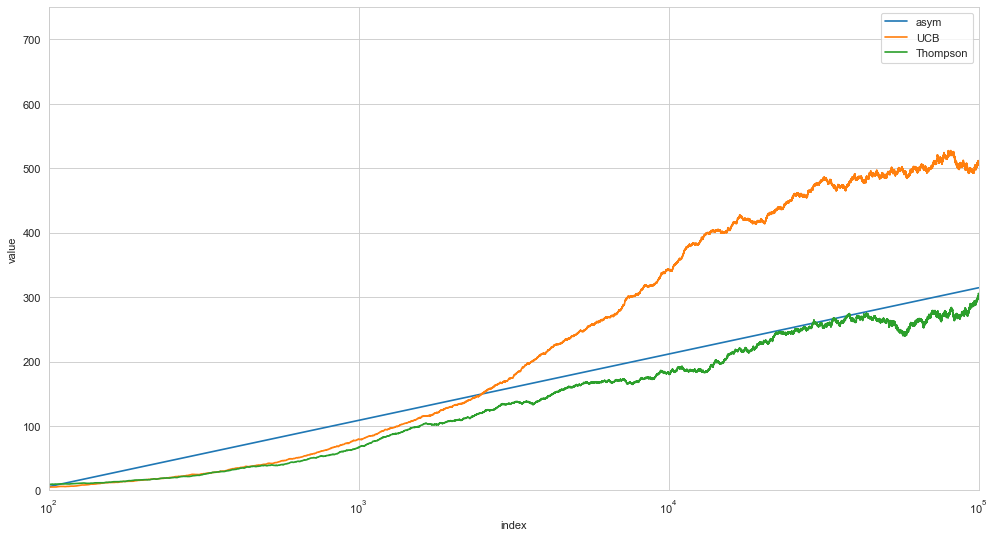

In [110]:
#plot all algorithm results
plt.figure(figsize=(15, 8), dpi=80)
sns.lineplot(data = asym_df, x='index', y='value', label='asym');
sns.lineplot(data = ucbou_df, x='index', y='value', label='UCB');
sns.lineplot(data = thomp_df, x='index', y='value', label='Thompson');
plt.xscale('log')
plt.xlim([100, 1_000_00])
plt.ylim([0,750])